# Discussion01 - Data Exploration, Linear Regression, SGD, Regularization, Logistic Regression

In this example, we will be using [the Wine Dataset from UCI](https://archive.ics.uci.edu/ml/datasets/wine). <br >
The data is the results of a chemical analysis of wines grown in the same region in Italy. <br >
There are 13 different measurements taken from 3 types of wines(cultivators/grapevines).

We will use this dataset to build a simple linear regression model, where SGD is used to update the parameters. <br >
Then, we will build a polynomial regression model involving regularization. <br >
Finally, we will also have a logistic regression model for a binary classification problem.


### Goals
- Data exploratory analysis
- Linear Regression
- Stochastic Gradient Descent
- Outlier Removal, Normalization and Standardization
 

- Polynomial Regression
- Overfitting and Underfitting
- Regularization (Ridge, Lasso)
 

- Logistic Regression
- Pricision, Recall, F1-score
 

- Visualizations to understand data characteristics or performance metrics
- Demo on some common Python libraries, e.g., Pandas, Numpy, and Scikit-Learn.


Instruction: Yun-Hsin Kuo.

## Understanding the Dataset 
In this section, we will explore this wine dataset to know it better. Here are some key points we'd like to focus on. 
 - Is this attribute numerical, categorical, or binary?
 - How is this attribute distributed? 
 - What are the relationships between the data attributes?
 - Which attribute could be used as the dependent variable? Which could be the independent variables?
 - Are there any outliers in observations?

 
We usually only need Pandas to do the work here.
Now let's import the data.

In [2]:
import pandas as pd
from sklearn.datasets import load_wine
df, _ = load_wine(return_X_y=True, as_frame=True) 
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


The ignored value is the ground-truth class, i.e., different grapevines, which is for classification and not really needed in linear regression. <br >
We will come back to them in Logistic Regression.

We can quickly check the info and the summary statistics of the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [4]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


From above, we know that there is **no null values**. We are also sure that all attributes are **numerical**. <br >
In addition, we know there are 178 observations(rows) and 13 attributes(columns), which you actually can just get via `df.shape`. <br >
Still, eyeballing these statistics would be a pain when you work with larger datasets.

Here, **visualizations** can come into play. <br >
In Python, here are some popular visualization libraries you could use:
 - [Matplotlib](https://matplotlib.org/): Low-level, but high flexibility.
 - [Seaborn](https://seaborn.pydata.org/index.html): Higher-level, easy to use, diverse visualizations.
 - [Plotly](https://plotly.com/python/): Interactive visualizations.
 - [ggplot](http://yhat.github.io/ggpy/): Python implementaion of ggplot2 from R.
 
Pandas is also capable of visualizing data, which is built upon Matplotlib.

### Distribution of Data Attributes

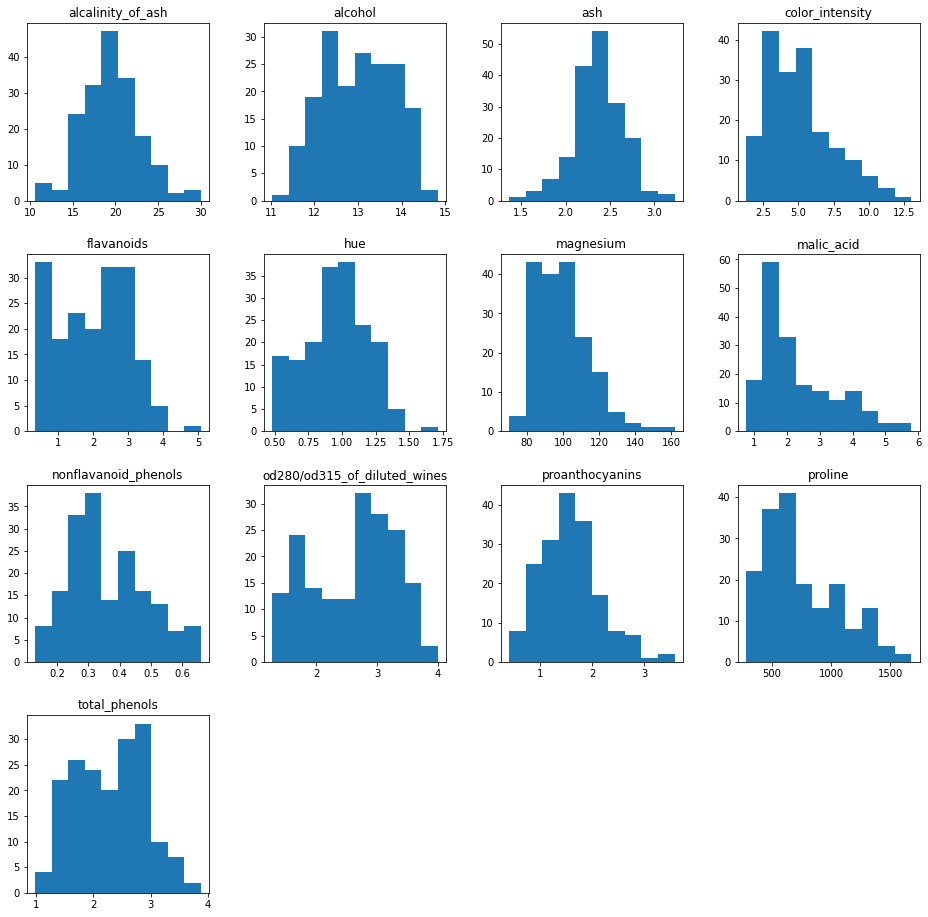

In [5]:
# This underscore skips printing the object information of our plot.
_ = df.hist(figsize=(16,16), grid=False)

From above distributions, we can see some are skewed, like "malic_acid", and some are not, such as "alcalinity_of_ash". <br >
We can also see some data points far from others, such as "flavanoids" or "hue".<br >
Alternatively, [boxplot](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html) is another good option to check distribution and outliers.

Understanding the distribution is important. Because depends on the problem we are solving, it helps us decide how to rescale the features.<br >
But for now, let's just put outliers and rescaliing aside.

### Relationships between Data Attributes

In [6]:
corr = df.corr() # In Pandas, we consider Pearson correlation by default.
corr.style.set_precision(3).background_gradient(cmap='RdBu', vmin=-1, vmax=1)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000,0.094,0.212,-0.310,0.271,0.289,0.237,-0.156,0.137,0.546,-0.072,0.072,0.644
malic_acid,0.094,1.000,0.164,0.289,-0.055,-0.335,-0.411,0.293,-0.221,0.249,-0.561,-0.369,-0.192
ash,0.212,0.164,1.000,0.443,0.287,0.129,0.115,0.186,0.010,0.259,-0.075,0.004,0.224
alcalinity_of_ash,-0.310,0.289,0.443,1.000,-0.083,-0.321,-0.351,0.362,-0.197,0.019,-0.274,-0.277,-0.441
magnesium,0.271,-0.055,0.287,-0.083,1.000,0.214,0.196,-0.256,0.236,0.200,0.055,0.066,0.393
total_phenols,0.289,-0.335,0.129,-0.321,0.214,1.000,0.865,-0.450,0.612,-0.055,0.434,0.700,0.498
flavanoids,0.237,-0.411,0.115,-0.351,0.196,0.865,1.000,-0.538,0.653,-0.172,0.543,0.787,0.494
nonflavanoid_phenols,-0.156,0.293,0.186,0.362,-0.256,-0.450,-0.538,1.000,-0.366,0.139,-0.263,-0.503,-0.311
proanthocyanins,0.137,-0.221,0.010,-0.197,0.236,0.612,0.653,-0.366,1.000,-0.025,0.296,0.519,0.330
color_intensity,0.546,0.249,0.259,0.019,0.200,-0.055,-0.172,0.139,-0.025,1.000,-0.522,-0.429,0.316


From above, we can quickly identify two pairs that share high linear correlation. <br >
The first is **Flavanoids & Total Phenols**, and the second one is **Falavanoids & OD280/315** instead. <br >
If we use them to do linear regression, we can expect a not-bad performance.

### Observing Outliers

Right before we go into Linear Regression with **Flavanoids & Total Phenols**, the last step we could take is to visualize them in the form of a scatter plot. <br >
This way, it allows us to see if there are hidden outliers, so that we can decide whether to filter out these outliers or not.

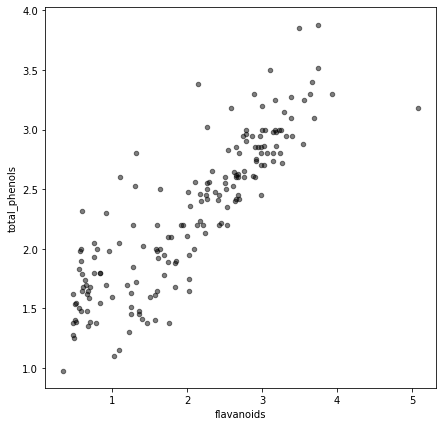

In [7]:
_ = df.plot.scatter(x='flavanoids', y='total_phenols', c='k', alpha=.5, figsize=(7,7))

Obviously, there is one outlier that should be excluded. <br >
Usually and formally, we need to rely on statistics to identify an outlier. <br >
But again for simplicity, we will go into linear regression first without filtering our data. <br >
We will come back to outlier removal, normalization, and standardization later. 

## Simple Linear Regression with Stochastic Gradient Descent

### Overview
Now let's use **flavanoids** to build a linear regression model that predicts **total_phenols**. <br >
Our model will be this equation: <br >
$y=\beta_{0} + \beta_{1}x$ <br >
, or $y=mx+b$, for simplicity. 

$x$ represents **flavanoids** and $y$ represents **total_phenols**. <br >
We will be searching the values of $m$ and $b$ that minimizes the fitting error, in order to find the best fit line. 

In this example, we use Mean Square Error for our loss function: <br >
$L = \dfrac{1}{N}\displaystyle \sum^{N}_{i=1} (y_i - \hat{y_i})^2$ 

Since $\hat{y_i}$ is our predicted value from the current model, we can replace $\hat{y_i}$ with $mx_i+b$ such that: <br >
$L = \dfrac{1}{N}\displaystyle \sum^{N}_{i=1} (y_i - (mx_i + b))^2$ 

Finally, we use Stochastic Gradient Descent to update our coefficients $m$ and $b$.

We will describe what hyperparameters we can play with later.

In [8]:
from IPython.display import Image
Image(url='https://alykhantejani.github.io/images/gradient_descent_line_graph.gif')

### Computing the Gradients
When using gradient descents, for each coefficient, we need to take the gradient of the loss function $L$ : 

$\dfrac{\partial L}{\partial m} = - \dfrac{1}{N} \displaystyle \sum_{i=1}^N 2x_i*(y_i - (m x_i + b))$

$\dfrac{\partial L}{\partial b} = - \dfrac{1}{N} \displaystyle \sum_{i=1}^N 2*(y_i - (m x_i + b))$

From a high level, here's how we update a coefficient $w$: \
$w' = w - \alpha \dfrac{\partial L}{\partial w}$, where $\alpha$ is the learning rate, one of the hyperparameters.

Moreover, since we will be doing **stochastic** gradient descent, we do not take all training instances into account. \
At one time, we only consider one of the training instances, $(x_i, y_i)$, during the update. \
Therefore, this is how we should update $m$ and $b$ separately: \
$m' = m - \alpha \dfrac{\partial L}{\partial m} = m + \alpha 2x_i*(y_i - (m x_i + b))$ 

$b' = b - \alpha \dfrac{\partial L}{\partial b} = b + \alpha 2*(y_i - (m x_i + b))$

In [9]:
Image(url='https://cdn-images-1.medium.com/max/368/1*e88JKNWAFok3vpjeuPfHig.gif')

In [10]:
Image(url='http://www.fredpark.com/uploads/2/6/8/7/26871600/grad-descent-quad-bowl_1_orig.gif')

### Building the Regression Model
We quickly introduce the main functionality of the following model.
 - `init`: The model is initialized with all the hyperparameters we can play with. Particularly, the **learning rate** and the **number of epochs** generally have an impact on the model performance.
 - `fit`: Set up the training data and monitors the training process.
 - `SGD`: Update the coefficients. Specifically, the loop is the key why we call it "stochastic".
 - `predict`: Given an $x$, use the current coefficients to predict $\hat y$. It accepts either one number or an array of $X$.
 - `computeMSE`: Compute the loss of the training data.

In [11]:
import numpy as np
class SimpleLinearRegression:
    def __init__(self, m_init=0, b_init=0, learning_rate=.05, epoch_num=100, verbose=True):
        self.verbosity = verbose
        # Training data
        self.X = None # Independent variables (flavanoids)
        self.y = None # Dependent variables (total_phenols)
        # Coefficients
        self.m = m_init
        self.b = b_init
        # Hyperparameters
        self.lr = learning_rate 
        self.epochs = epoch_num
        # Tracking the training process
        self.log= []
    
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        self.N = self.X.shape[0] # .shape returns (nrow, ncol)
        # Based on our code, the dataframe index would be the epochs, so we do not need to record it
        self.log.append({'MSE': self.computeMSE(self.X, self.y), 'm':self.m, 'b':self.b})
        
        for epoch in range(self.epochs):
            # verbose
            if(epoch % 20 == 0 and self.verbosity): print(f'Epoch {epoch}: current training loss is {self.computeMSE(self.X, self.y)}')
            self.SGD()
            self.log.append({'MSE': self.computeMSE(self.X, self.y), 'm': self.m, 'b': self.b})
    
    def SGD(self):
        for idx in range(self.N): 
            obs = self.X[idx]
            y_obs = self.y[idx]
            y_hat = self.predict(obs)
            
            # Refer to the formulas listed above
            m_grad = -2*obs*(y_obs - y_hat)
            b_grad = -2*(y_obs - y_hat)
            
            m_update = self.m - self.lr * m_grad
            b_update = self.b - self.lr * b_grad
            
            self.m = m_update
            self.b = b_update
    
    def predict(self, x): 
        return self.m*x + self.b
    
    def computeMSE(self, x, y):
        loss = np.mean((y - self.predict(x))**2)
        return np.round(loss, 4)
    
    def getLog(self):
        return pd.DataFrame(self.log)
    
    def getParams(self):
        return self.m, self.b

### Epochs, Batches, and Iterations
You will be seeing these terms A LOT in this course. They are different, but we often get confused by them.
 - `Epoch`: When the entire dataset is passed through the model only once, that is one epoch.
 - `Batch`: Smaller subsets of the dataset, when we do not pass the whole dataset to the model at once.
     - `Batch size`: The number of data samples inside one batch/subset.
 - `Iteration`: The number of batches needed to complete one epoch. In other words, it is the same as number of batches.
 
Using the above model as an example, the loop in the `fit` function is related to `epochs`. <br >
This is often related to overfitting and underfitting of a model, which we will cover later in Polynomial Regression.

As in `SGD`, we at one time only pick one data sample to update our coefficients, the `batch size` is then to be 1. <br >
So the loop in `SGD` essentially loops through all the batches, `len(N)` would refer to the number of batches, which is also `iterations`. <br >

For more detailed explanation, feel free to check out [this article](https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9) and [this one SGD linear regression example](https://towardsdatascience.com/step-by-step-tutorial-on-linear-regression-with-stochastic-gradient-descent-1d35b088a843)

### Splitting the training and testing dataset

When we are training the model, we usually split the data into two parts: Training set and Testing set.
We use only Training set to build the model and update the model coefficients.
On the other hand, we treat Testing set as the real world cases and use them to evaluate how well the built model learned.

8:2 is a common ratio used in splitting the dataset.

In [12]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=21)

X_train, X_test = train['flavanoids'], test['flavanoids']
y_train, y_test = train['total_phenols'], test['total_phenols']

### Testing different models

In [13]:
# Remember that we have default values for all the parameters, this is the base model
m1 = SimpleLinearRegression()
m1.fit(X_train, y_train)
m1_log = m1.getLog()
print(f'Testing MSE error is: {m1.computeMSE(X_test, y_test)}')

Epoch 0: current training loss is 5.6705
Epoch 20: current training loss is 0.1865
Epoch 40: current training loss is 0.1865
Epoch 60: current training loss is 0.1865
Epoch 80: current training loss is 0.1865
Testing MSE error is: 0.208


Text(0, 0.5, 'b')

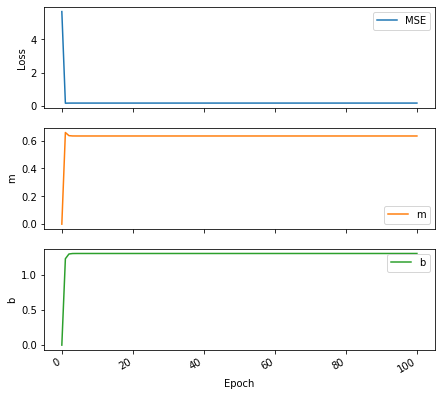

In [14]:
[MSE_plot, m_plot, b_plot] = m1_log.plot(subplots=True, figsize=(7,7), sharex=True)
b_plot.set_xlabel('Epoch')
MSE_plot.set_ylabel('Loss')
m_plot.set_ylabel('m')
b_plot.set_ylabel('b')

We can see a very quick convergence before epoch 20. <br >
Moreover, the testing error is not far from the training error, meaning that this base model might be good enough.<br >
Still, can we do better by changing the hyperparameters? 

In [15]:
# Different default values for the coefficients
m2 = SimpleLinearRegression(m_init=-10, b_init=10)
m2.fit(X_train, y_train)
m2_log = m2.getLog()
print(f'Testing MSE error is: {m2.computeMSE(X_test, y_test)}')

Epoch 0: current training loss is 264.6964
Epoch 20: current training loss is 0.1865
Epoch 40: current training loss is 0.1865
Epoch 60: current training loss is 0.1865
Epoch 80: current training loss is 0.1865
Testing MSE error is: 0.208


In [16]:
# Too large learning rate
m3 = SimpleLinearRegression(learning_rate=0.1, epoch_num=200)
m3.fit(X_train, y_train)
m3_log = m3.getLog()
print(f'Testing MSE error is: {m3.computeMSE(X_test, y_test)}')

Epoch 0: current training loss is 5.6705
Epoch 20: current training loss is 0.6845
Epoch 40: current training loss is 0.6845
Epoch 60: current training loss is 0.6845
Epoch 80: current training loss is 0.6845
Epoch 100: current training loss is 0.6845
Epoch 120: current training loss is 0.6845
Epoch 140: current training loss is 0.6845
Epoch 160: current training loss is 0.6845
Epoch 180: current training loss is 0.6845
Testing MSE error is: 0.7495


In [17]:
# Smaller learning rate
m4 = SimpleLinearRegression(learning_rate=0.005, epoch_num=200)
m4.fit(X_train, y_train)
m4_log = m4.getLog()
print(f'Testing MSE error is: {m4.computeMSE(X_test, y_test)}')

Epoch 0: current training loss is 5.6705
Epoch 20: current training loss is 0.0999
Epoch 40: current training loss is 0.0999
Epoch 60: current training loss is 0.0999
Epoch 80: current training loss is 0.0999
Epoch 100: current training loss is 0.0999
Epoch 120: current training loss is 0.0999
Epoch 140: current training loss is 0.0999
Epoch 160: current training loss is 0.0999
Epoch 180: current training loss is 0.0999
Testing MSE error is: 0.1043


The regression model is: y=0.5418292549700628*x + 1.2450572095816073


Text(0, 0.5, 'b')

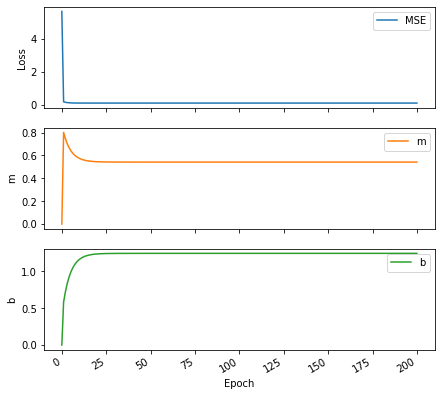

In [18]:
m_m4, b_m4 = m4.getParams()
print(f'The regression model is: y={m_m4}*x + {b_m4}')
[MSE_plot, m_plot, b_plot] = m4_log.plot(subplots=True, figsize=(7,7))
b_plot.set_xlabel('Epoch')
MSE_plot.set_ylabel('Loss')
m_plot.set_ylabel('m')
b_plot.set_ylabel('b')

### Plotting the Model
We domenstrated how to visualize the performance metrics and coefficient values above. <br >
We can also visualize how this trained model describe the data. 
Let's use `m4` for the example. <br >
Rather than Pandas, let's directly use Matplotlib this time.

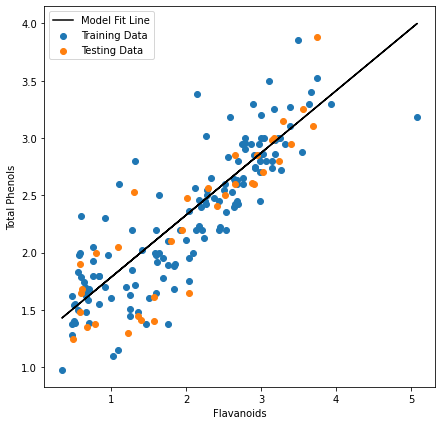

In [19]:
import matplotlib.pyplot as plt
# Set up the figure size
plt.figure(figsize=(7,7))

# Plotting the points
plt.scatter(X_train, y_train, color='tab:blue')
plt.scatter(X_test, y_test, color='tab:orange')

# Plotting the model fit line. You can replace m4 with other models to see what those models look like.
X = df['flavanoids']
plt.plot(X, m4.predict(np.asarray(X)), color='k')

plt.xlabel("Flavanoids")
plt.ylabel("Total Phenols")
plt.legend(['Model Fit Line', 'Training Data', 'Testing Data'])

plt.show()

### Sanity Check
Are the results reasonable? Let's use the scikit-learn's package to do a sanity check. <br >
Note that [the Linear Regression in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) uses **Ordinary Least Squares** to minimize the loss function, unlike we are using SGD.

In [20]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression(normalize=True)
lr.fit(np.asarray(X_train).reshape(-1, 1), np.asarray(y_train).reshape(-1, 1))
predicted = lr.predict(np.asarray(X_test).reshape(-1,1))
print(f'Testing MSE error is: {round(mean_squared_error(predicted, y_test),4)}')

Testing MSE error is: 0.0998


## Outlier Removal, Normalization, and Standardization
So far what we have demonstrated is based on the unpreprocessed dataset. <br >
However, **data preprocessing** is a critical factor to the model performance. <br >
In the following section, we will rebuild the Linear Regression model, after we remove outliers.

For now, we will not dive into normalization and standardization too much, but we will come back to it later. <br >
This is simply because other tasks can demonstrate their importance much more effectively than regression do.

### Outlier Detection and Removal
Remember we saw one possible outlier earlier in the scatter plot? <br >
How do we have confidence assuming it to be an outlier? <br >
Or a more fundamental question, how do we identify an outlier?

Detecting outliers itself is already a field of research. But, since an outlier generally is an observation unlike others, often we can use data distribution to find outliers. <br >
In this example, we will use one simple method, **z-score**.

Here are some discussion about [when and how](https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/) to remove outliers. 

For a data point $x$, its z-score $z$ is formally defined as: <br >
$z = \dfrac{x-\mu}{\sigma}$, where $\mu$ is the observed average, and $\sigma$ is the observed standard deviation.

The intuition behind z-score is that, we'd like to evaluate how far an observation is from the observed average, in terms of standard deviation. <br >
If one data point has a z-score of 2, this means it is $2\sigma$ higher than the average. <br >
For more information, feel free to check out [Wikipedia](https://en.wikipedia.org/wiki/Standard_score).

The common practice is if a data point's z-score is more than 3 or less than -3, i.e., **$3\sigma$ far away from the average**, we treat it as an outlier and remove it.

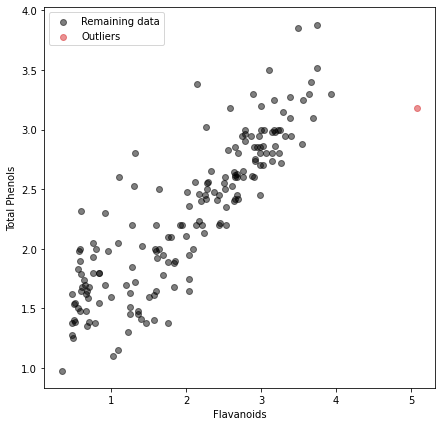

In [21]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# As we are just using these two features in our regression model, we only consider the z-score for them.
df_lr = df[['flavanoids', 'total_phenols']].copy()

# Compute the z-score
non_outlier_mask = (np.abs(stats.zscore(df_lr)) < 3).all(axis=1) 
#.all(axis=1) means that we only return True when all the columnwise computed z-score are within (-3, 3), for one data point

# Removing Outliers
df_lr_filtered = df_lr.loc[non_outlier_mask] 
outliers = df_lr.loc[~non_outlier_mask]

#### Plotting ####
plt.figure(figsize=(7,7))

plt.scatter(df_lr_filtered['flavanoids'], df_lr_filtered['total_phenols'], color='k', alpha=.5)
plt.scatter(outliers['flavanoids'], outliers['total_phenols'], color='tab:red', alpha=.5)

plt.xlabel("Flavanoids")
plt.ylabel("Total Phenols")
plt.legend(['Remaining data', 'Outliers'])

plt.show()

Epoch 0: current training loss is 5.5657
Epoch 20: current training loss is 0.0984
Epoch 40: current training loss is 0.0984
Epoch 60: current training loss is 0.0984
Epoch 80: current training loss is 0.0984
Epoch 100: current training loss is 0.0984
Epoch 120: current training loss is 0.0984
Epoch 140: current training loss is 0.0984
Epoch 160: current training loss is 0.0984
Epoch 180: current training loss is 0.0984
Testing MSE error is: 0.0913


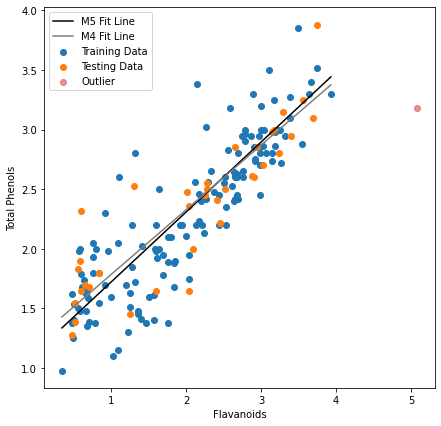

In [22]:
#### Splitting dataset ####
train, test = train_test_split(df_lr_filtered, test_size=0.2, random_state=21)
X_train_filtered, X_test_filtered = train['flavanoids'], test['flavanoids']
y_train_filtered, y_test_filtered = train['total_phenols'], test['total_phenols']

#### Training with the m4 setting ####
m5 = SimpleLinearRegression(learning_rate=0.005, epoch_num=200)
m5.fit(X_train_filtered, y_train_filtered)
m5_log = m5.getLog()
print(f'Testing MSE error is: {m5.computeMSE(X_test_filtered, y_test_filtered)}')

#### Plotting the m5 model ####
plt.figure(figsize=(7,7))

plt.scatter(X_train_filtered, y_train_filtered, color='tab:blue')
plt.scatter(X_test_filtered, y_test_filtered, color='tab:orange')
plt.scatter(outliers['flavanoids'], outliers['total_phenols'], color='tab:red', alpha=.5)

X = df_lr_filtered['flavanoids']
plt.plot(np.sort(X), m5.predict(np.asarray(np.sort(X))), color='k')
plt.plot(np.sort(X), m4.predict(np.asarray(np.sort(X))), color='tab:gray')

plt.xlabel("Flavanoids")
plt.ylabel("Total Phenols")
plt.legend(['M5 Fit Line', 'M4 Fit Line', 'Training Data', 'Testing Data', 'Outlier'])

plt.show()

### Normalization and Standardization
Why should we standardize or normalize the data in preprocessing? <br >
Because the attributes/features in the dataset may have different scales and thus varying data ranges. <br >
For example, `age` might falls in between (0, 100), but `income` might be (0, 100000). <br >
Essentially, standardization and normalization help us equalize the data ranges.

**Standardization** rescales the data to have a mean of 0 and a standard deviation of 1. <br >
**Normalization** rescales the data values into a range of [0, 1].

There is no definite answer to choosing one over another. It is **problem dependent**. <br >
But, from experience, we usually know that standardization is particularly important to classification, clustering, or dimensionality reduction. <br >
On the other hand, normalization is often adopted when it comes to image processing and the neural network.

Now let's see how these preprocessing techniques transform the data we have. <br >
We will see the effectiveness and the necessity of applying them in the later lectures :)

If interested, here is [how scikit-learn compare different scaling methods](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

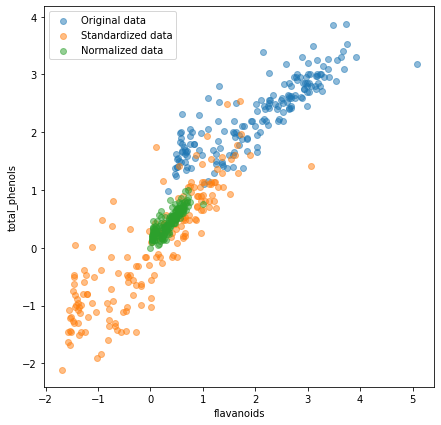

In [23]:
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Standardization
df_stand = preprocessing.StandardScaler().fit_transform(df.copy())
df_stand = pd.DataFrame(df_stand, columns=df.columns)
# Normalization
df_norm = preprocessing.MinMaxScaler().fit_transform(df.copy())
df_norm = pd.DataFrame(df_norm, columns=df.columns)

# Try different columns in the dataset!
col_x = 'flavanoids'
col_y = 'total_phenols'

plt.figure(figsize=(7,7))
plt.scatter(df[col_x], df[col_y], color='tab:blue', alpha=.5)
plt.scatter(df_stand[col_x], df_stand[col_y], color='tab:orange', alpha=.5)
plt.scatter(df_norm[col_x], df_norm[col_y], color='tab:green', alpha=.5)

plt.xlabel(col_x)
plt.ylabel(col_y)
plt.legend(['Original data', 'Standardized data', 'Normalized data'])
plt.show()

## Polynomial Regression with Regularization

In this section, we will go through a polynomial regression example to show demonstrate underfitting and overfitting, and how to prevent overfitting with regularization.

Below, we can see that the data does not share a linear relationship.

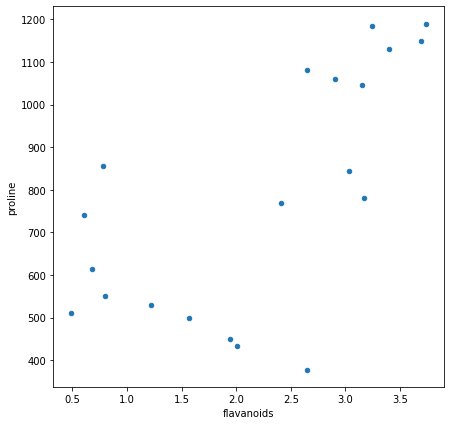

In [24]:
# You can try different number of data points
df_p = df.sample(20, random_state=21).sort_values(by=['flavanoids'])
X = np.asarray(df_p['flavanoids'])
y = np.asarray(df_p['proline'])

_ = df_p.plot.scatter(x='flavanoids', y='proline', figsize=(7,7), grid=False)

### Underfitting
It is trivial to see that a **simple linear regression** model would cause the underfitting problem.

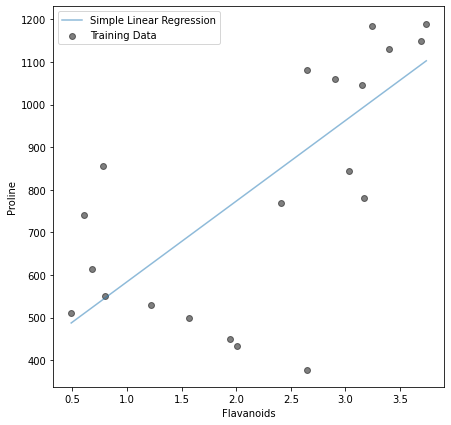

In [24]:
mp = SimpleLinearRegression(learning_rate=0.005, epoch_num=200, verbose=False)
mp.fit(X, y)

plt.figure(figsize=(7,7))
plt.scatter(X, y, color='k', alpha=.5)
plt.plot(np.sort(X), mp.predict(np.sort(X)), color='tab:blue', alpha=.5)

plt.xlabel("Flavanoids")
plt.ylabel("Proline")
plt.legend(['Simple Linear Regression', 'Training Data'])

plt.show()

### Polynomial Regression
In Lecture 3, we introduced Polynomial Regression that considers the relationship between $y$ and the $d$th degree polynomial in $x$. 

$y = \beta_{0} + \beta_{1}x + \beta_{2}x^2 + \beta_{3}x^3 + \cdots + \beta_{d}x^d$

One way to implement polynomial regression is to utilize `PolynomialFeatures` from scikit-learn.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

deg = 5

poly = PolynomialFeatures(degree=deg, include_bias=False)
demo = poly.fit_transform(np.arange(5).reshape(-1, 1))# [0, 1, 2, 3, 4]
pd.DataFrame(demo, columns=[f'x{d+1}' for d in range(deg)])

,x1,x2,x3,x4,x5
0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0
2,2.0,4.0,8.0,16.0,32.0
3,3.0,9.0,27.0,81.0,243.0
4,4.0,16.0,64.0,256.0,1024.0


,b0,b1,b2,b3
0,"1,062.0569920940",-889.2348347952,402.8506334537,-41.1058250497


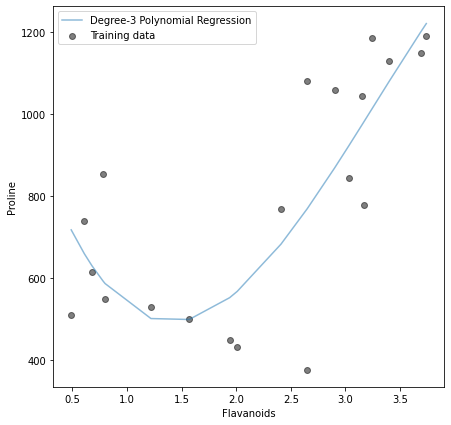

In [26]:
from sklearn.linear_model import LinearRegression
from IPython.display import display

def PolynomialRegression(X, y, deg=2, figsize=7):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    # This exactly implements the above formula
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    
    # Printing Coefficients
    coef = pd.DataFrame(polyReg.coef_, columns=[f'b{i+1}' for i in range(deg)])
    coef.insert(loc=0, column='b0', value=polyReg.intercept_)
    coef = coef.style.format("{:10,.10f}") # Comment this out to not suppressing the scientific notation
    display(coef)
    
    #### Plotting ####
    plt.figure(figsize=(figsize, figsize))
    plt.scatter(X, y, color='k', alpha=.5)
    plt.plot(X, polyReg.predict(X_poly), color='tab:blue', alpha=.5)

    plt.xlabel("Flavanoids")
    plt.ylabel("Proline")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'Training data'])
    plt.show()
    
PolynomialRegression(X, y, deg=3)

### Overfitting
A couple of signs that you might have an overfitting problem:
 - The number of parameters in your model is close to the number of your training data points.
 - The testing error suddently increases A LOT when the training error decreases over epochs.
 - The values of parameters become unreasonably large compared to the scale in your data.

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15
0,"-1,414,007.0165695189","13,108,522.8034186345","-51,718,632.5854538381","111,567,925.0917400271","-135,654,029.6129111648","69,361,664.5093054473","51,823,718.0978541076","-131,647,508.2466668040","127,052,877.6161364615","-76,493,740.0926118940","31,482,834.9017406888","-9,043,745.4723047242","1,790,516.8321030906","-233,433.7636986771","18,063.5980024282",-629.0461215675


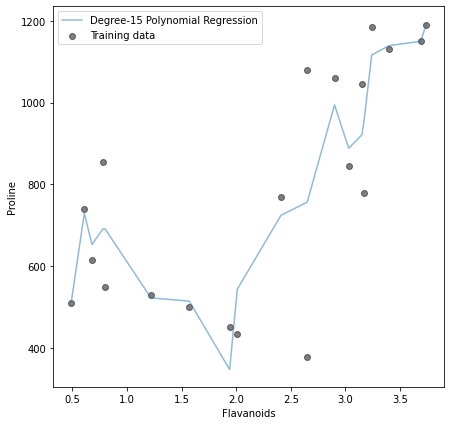

In [27]:
PolynomialRegression(X, y, deg=15)

### Regularization
Regularization is one way to prevent overfitting. <br >
The idea is to penalize the coefficients so that you are discouraged to learn a complex model. <br >
To achieve so, we would add a regularization term to the loss function.

`l1-regularization` and `l2-regularization` are commonly adopted terms in machine learning, with one more hyperparamter $\lambda$, known as "regularization rate". (Note that it is called "alpha" in scikit-learn.)

`l1-regularization`: $\lambda \displaystyle \sum_{j=0}^{n}|\beta_{j}|$

`l2-regularization`: $\lambda \displaystyle \sum_{j=0}^{n}\beta_{j}^2$

In regression, they are known as **Lasso Regression** and **Ridge Regression** separately. <br >
Now let's see how regularization can help prevent overfitting in Polynomial Regression.

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 252359.99834817817, tolerance: 152.390455
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73573e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15
0,"-1,414,007.0165695189","13,108,522.8034186345","-51,718,632.5854538381","111,567,925.0917400271","-135,654,029.6129111648","69,361,664.5093054473","51,823,718.0978541076","-131,647,508.2466668040","127,052,877.6161364615","-76,493,740.0926118940","31,482,834.9017406888","-9,043,745.4723047242","1,790,516.8321030906","-233,433.7636986771","18,063.5980024282",-629.0461215675
1,865.0105524428,-364.4896305467,23.2972245589,31.8252864782,3.9289669960,0.0584564340,-0.1062475124,-0.0353964179,-0.0079490730,-0.0014510839,-0.0002142247,-0.0000204048,0.0000014995,0.0000015893,0.0000006066,0.0000001856
2,604.5663303671,58.1243679076,37.8893136658,-0.1892591291,-28.5221315624,-36.0315317318,-22.7924956286,0.7832450422,16.7901819608,11.4874863566,-6.2949564030,-7.1464236364,5.7610642565,-1.5839323812,0.1893637455,-0.0080085561


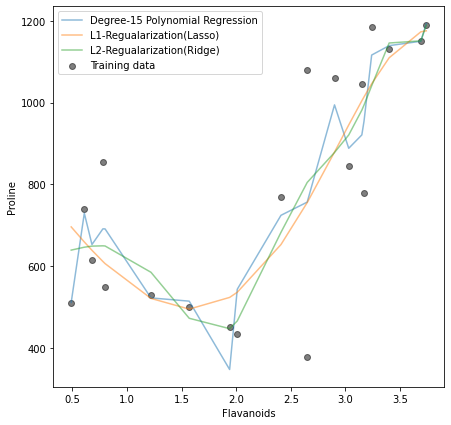

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from IPython.display import display

def RegularizedPolynomialRegression(X, y, deg=2, figsize=7, lamda=0.2):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_poly = poly.fit_transform(X.reshape(-1, 1))
    
    # Polynomial Regression
    polyReg = LinearRegression().fit(X_poly, y.reshape(-1, 1)) 
    # Polynomial Regression with l1-regularization
    polyRegL1 = Lasso(alpha=lamda).fit(X_poly, y.reshape(-1, 1))
    # Polynomial Regression with l2-regularization
    polyRegL2 = Ridge(alpha=lamda).fit(X_poly, y.reshape(-1, 1))
    
    # Printing Coefficients
    coef = np.concatenate((polyReg.coef_.reshape(1, -1), polyRegL1.coef_.reshape(1, -1), polyRegL2.coef_.reshape(1, -1)), axis=0)
    coef = pd.DataFrame(coef, columns=[f'b{i+1}' for i in range(deg)])
    intercepts = [polyReg.intercept_[0], polyRegL1.intercept_[0], polyRegL2.intercept_[0]]
    coef.insert(loc=0, column='b0', value=intercepts)
    coef = coef.style.format("{:10,.10f}") # Comment this out to not suppressing the scientific notation
    display(coef) 
    
    #### Plotting ####
    plt.figure(figsize=(figsize, figsize))
    plt.scatter(X, y, color='k', alpha=.5)
    
    plt.plot(X, polyReg.predict(X_poly), color='tab:blue', alpha=.5)
    plt.plot(X, polyRegL1.predict(X_poly), color='tab:orange', alpha=.5)
    plt.plot(X, polyRegL2.predict(X_poly), color='tab:green', alpha=.5)

    plt.xlabel("Flavanoids")
    plt.ylabel("Proline")
    plt.legend([f'Degree-{deg} Polynomial Regression', 'L1-Regualarization(Lasso)', 'L2-Regualarization(Ridge)' ,'Training data'])
    plt.show()

RegularizedPolynomialRegression(X, y, deg=15)

## Logistic Regression

The wine dataset actually contains information of 3 types of wines. Now let's see if we can distinguish two of them using Logisitic Regression.

In [25]:
df, classes = load_wine(return_X_y=True, as_frame=True) 
df['class'] = classes
df = df.loc[(df['class'] != 2)]

# You can try remove outliers here.

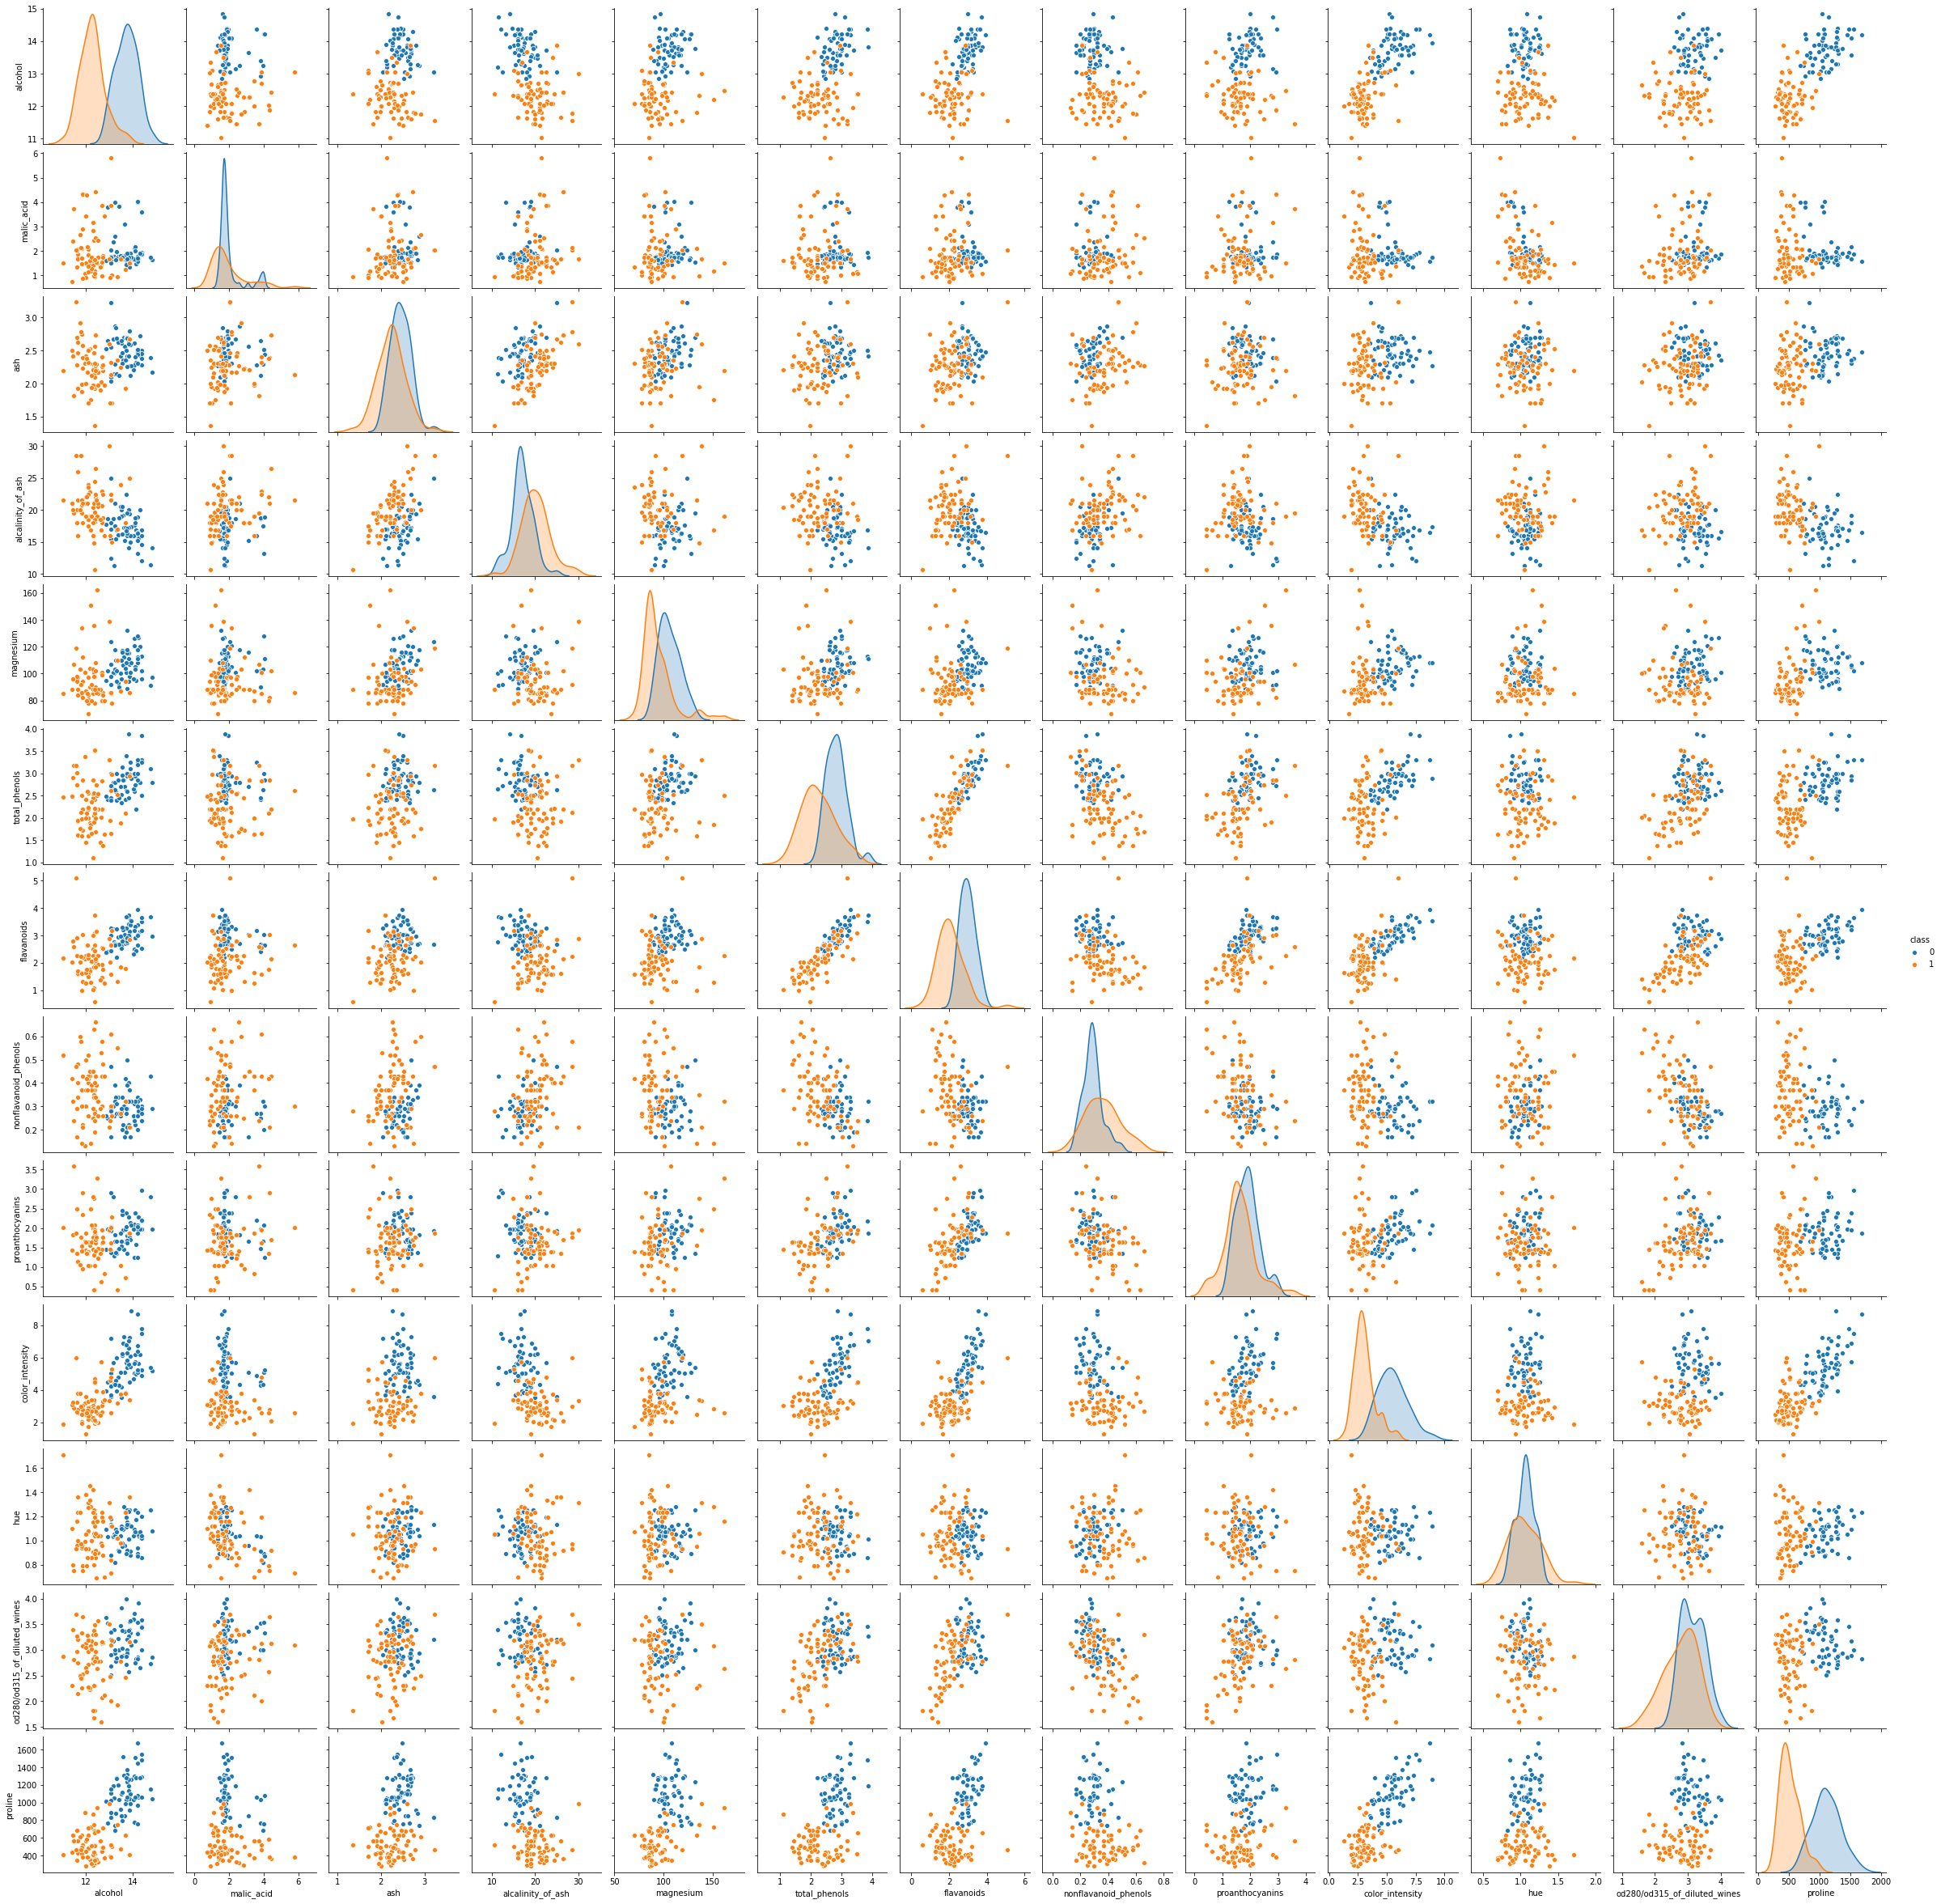

In [30]:
import seaborn as sns
# This would take a while
_ = sns.pairplot(df, hue='class')

In [26]:
from sklearn import preprocessing
train, test = train_test_split(df, test_size=0.2, random_state=21)

X_train, y_train = train.drop(columns=['class']), train['class']
X_test, y_test = test.drop(columns=['class']), test['class']

# You can try replace StandardScaler with other scalings such as MinMaxScaler()
# Or, you can also try not rescaling the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape)

(104, 13) (26, 13)


### Overview

Logistic Regression is used to perform classification because its output $\hat y$ is either 0 or 1, generated by a sigmoid function.

$\hat y = sigmoid(z) = \dfrac{1}{1 + e^{-z}}$, where the value of $z$ is defined as

$z = \pmb{w}^{T}\pmb{x} = w_{1}x_{1} + w_{2}x_{2} + \ldots + w_{j}x_{j}$, where $j$ refers to the number of features in our dataset. 

The loss function is formally composed of two parts:

$\begin{equation}
       L = 
        \begin{cases}
            -\log{(\hat y)} & \text{if $y=1$ } \\
            -\log{(1 - \hat y)} & \text{if $y=0$}
        \end{cases}
\end{equation}$

But we can combine them together as follows:

$L = -\dfrac{1}{N} \displaystyle \sum_{i=1}^{N} [y_{i}\cdot \log{(\hat y)} + (1 - y_{i})\cdot\log{(1 - \hat y)}]$, where $N$ is the number of training data points.

### Updating Coefficients with Stochastic Gradient Descent

$\dfrac{\partial L}{\partial w_{j}} = - (y - \hat y) \cdot x_{j}$

$w_{j}' = w_{j} - \alpha \dfrac{\partial L}{\partial w_{j}} = w_{j} + \alpha \cdot (y - \hat y) \cdot x_{j}$, for each of the coefficient. $x_{j}$ refers to the $j^{th}$ feature in a training instance $x$.



In [33]:
Image(url='https://i.stack.imgur.com/czEqL.png')

In [34]:
Image(url='https://amsi.org.au/ESA_Senior_Years/imageSenior/3h_3.png')

### Involving Regularizations
Here's how would things look like if we involve regularizations. <br >
In the following, $i$ and $N$ refer to the number of training data points we have, and $j$ and $M$ refer to the number of features we used in the model. <br >


#### l1-Regularization

$L = -\dfrac{1}{N} \displaystyle \sum_{i=1}^{N} [y_{i}\cdot \log{(\hat y)} + (1 - y_{i})\cdot\log{(1 - \hat y)}] + \lambda \displaystyle \sum_{j=1}^{M}|w_{j}|$

$\dfrac{\partial L}{\partial w_{j}} = - (y - \hat y) \cdot x_{j} + \lambda \dfrac{\partial |w_{j}|}{\partial w_{j}} = - (y - \hat y) \cdot x_{j} + \lambda \cdot sign(w_{j})$

$\dfrac{\partial |w_{j}|}{\partial w_{j}} = sign(w_{j}) = 
    \begin{cases}
            -1 & \text{if $w_{j} < 0$ } \\
            0 & \text{if $w_{j} =0 $} \\
            +1 & \text{if $w_j > 0$}
    \end{cases}
$

In [27]:
Image(url='https://i.stack.imgur.com/cmWO0.png')

#### l2-Regularization

$L = -\dfrac{1}{N} \displaystyle \sum_{i=1}^{N} [y_{i}\cdot \log{(\hat y)} + (1 - y_{i})\cdot\log{(1 - \hat y)}] + \lambda \displaystyle \sum_{j=0}^{M}w_{j}^2$

$\dfrac{\partial L}{\partial w_{j}} = - (y - \hat y) \cdot x_{j} + \lambda \cdot (2w_{j})$

In [28]:
class SimpleLogisticRegression:
    def __init__(self, epoch_num=200, learning_rate=0.05, verbose=False, reg_mode='none', reg=0.2):
        self.verbosity = verbose
        self.reg_modes = ['l1', 'l2', 'none']
        # Training data
        self.X = None
        self.y = None
        # Coefficients
        self.w = None
        # Hyperparameters
        self.lr = learning_rate
        self.epochs = epoch_num
        if (reg_mode not in self.reg_modes) or reg_mode == 'none':
            self.reg_mode = 'none'
            self.reg = 0
        else:
            self.reg_mode = reg_mode
            self.reg = reg
        # Tracking the training process
        self.log = []
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-(np.dot(x, self.w))))
    
    def fit(self, X, y):
        self.X = np.asarray(X)
        self.y = np.asarray(y)
        self.N = self.X.shape[0]
        self.w = np.zeros(X.shape[1]) # Initialize weights/coefficients with the Number of features
        # Based on our code, the dataframe index would be the epochs, so we do not need to record it
        self.log.append({'Loss': self.computeLoss(self.X, self.y)})
        
        for epoch in range(self.epochs):
            # verbose
            if(epoch % 20 == 0 and self.verbosity): print(f'Epoch {epoch}: current training loss is {self.computeLoss(self.X, self.y)}')
            self.SGD()
            self.log.append({'Loss': self.computeLoss(self.X, self.y)})
        
    def SGD(self):
        for idx in range(self.N): 
            obs = self.X[idx]
            y_obs = self.y[idx]
            y_hat = self.sigmoid(obs)

            # This is for all weights
            if self.reg_mode == 'none':
                gradient = (y_obs - y_hat)*obs 
            elif self.reg_mode == 'l1':
                gradient = (y_obs - y_hat)*obs - self.reg*np.sign(self.w)
            elif self.reg_mode == 'l2':
                gradient = (y_obs - y_hat)*obs - 2*self.reg*self.w
                
            update = self.w + self.lr*gradient
            
            self.w = update
        
    def computeLoss(self, x, y):
        y_hat = self.sigmoid(x)
        if self.reg_mode == 'none':
            reg_loss = 0
        elif self.reg_mode == 'l1':
            reg_loss = self.reg * np.sum(np.abs(self.w))
        elif self.reg_mode == 'l2':
            reg_loss = self.reg * np.sum(np.square(self.w))
            
        loss = - y*np.log(y_hat) - (1-y)*np.log(1-y_hat)
        return np.mean(loss) + reg_loss
    
    def predict(self, x):
        # 1 if self.sigmoid(x) is over 0.5; 0, otherwise.
        return np.around(self.sigmoid(x)).astype(int)
    
    def score(self, x):
        return np.dot(x, self.w)
    
    def getLog(self):
        return pd.DataFrame(self.log)
    
    def getParams(self):
        return self.w
    

In [29]:
ml = SimpleLogisticRegression(verbose=True, reg_mode='l2', reg=0.2)
ml.fit(X_train, y_train)
print(f'Testing error is: {ml.computeLoss(X_test, y_test)}')

Epoch 0: current training loss is 0.6931471805599453
Epoch 20: current training loss is 0.3936352654524875
Epoch 40: current training loss is 0.3936352654524875
Epoch 60: current training loss is 0.3936352654524875
Epoch 80: current training loss is 0.3936352654524875
Epoch 100: current training loss is 0.3936352654524875
Epoch 120: current training loss is 0.3936352654524875
Epoch 140: current training loss is 0.3936352654524875
Epoch 160: current training loss is 0.3936352654524875
Epoch 180: current training loss is 0.3936352654524875
Testing error is: 0.39576621811913104


In [35]:
ml_l1 = SimpleLogisticRegression(verbose=True, reg_mode='l1', reg=0.2)
ml_l1.fit(X_train, y_train)
print(f'Testing error is: {ml_l1.computeLoss(X_test, y_test)}')

Epoch 0: current training loss is 0.6931471805599453
Epoch 20: current training loss is 0.6057376555221297
Epoch 40: current training loss is 0.6030848642450934
Epoch 60: current training loss is 0.6016106250631219
Epoch 80: current training loss is 0.6051791273253254
Epoch 100: current training loss is 0.6052268486706027
Epoch 120: current training loss is 0.6039905207130747
Epoch 140: current training loss is 0.6042507318949362
Epoch 160: current training loss is 0.6020354903827978
Epoch 180: current training loss is 0.602488710877934
Testing error is: 0.6120929429572837


In [39]:
display(pd.DataFrame(ml.getParams().reshape(1, -1), columns=df.columns[:-1]))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.458953,-0.076879,-0.16123,0.186578,-0.169745,-0.106353,-0.161142,0.050572,-0.095159,-0.293249,-0.058132,-0.173854,-0.380875


In [37]:
display(pd.DataFrame(ml_l1.getParams().reshape(1, -1), columns=df.columns[:-1]))

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,-0.539161,0.00001,-0.036677,0.013403,-0.039033,-0.016019,-0.011371,0.012947,-0.036916,-0.014107,0.016139,-0.024115,-0.52111


5 mispredictions out of 104 attempts


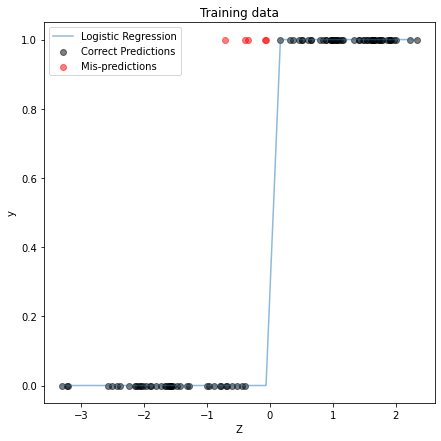

0 mispredictions out of 26 attempts


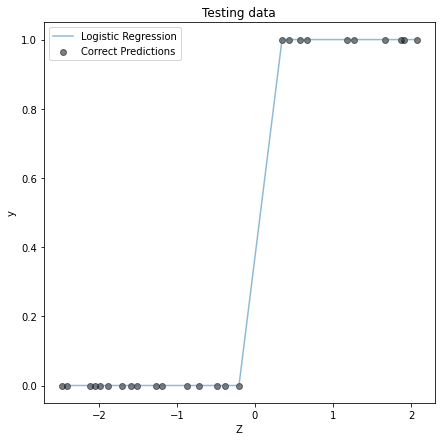

In [30]:
def plotLogistic(x, y, model, figsize=7, title='Training data'):
    plt.figure(figsize=(figsize,figsize))
    pred = x[(model.predict(x) == y), :]
    misPred = x[(model.predict(x) != y), :]
    print(f'{misPred.shape[0]} mispredictions out of {x.shape[0]} attempts')

    plt.scatter(model.score(pred), model.predict(pred), color='k', alpha=.5)
    if misPred.shape[0] > 0:
        plt.scatter(model.score(misPred), 1 - model.predict(misPred), color='r', alpha=.5)

    line = sorted(zip(model.score(x), model.predict(x)))
    line_x, line_y = zip(*line)
    plt.plot(line_x, line_y, color='tab:blue', alpha=.5)

    plt.xlabel("Z")
    plt.ylabel("y")
    plt.legend(['Logistic Regression', 'Correct Predictions', 'Mis-predictions'])
    plt.title(title)
    plt.show()

plotLogistic(X_train, y_train, ml)
plotLogistic(X_test, y_test, ml, title='Testing data')

### Precision, Recall, and F1-score
When we are solving a supervised classification problem, **accuracy** is a better metric to evaluate the model than training/testing error is. 

Simply looking at $\dfrac{\text{# of correct predictions}}{\text{# of total samples}}$ is a way, but...<br >
there is a difference between `predicting a diseased patient to be healthy` and `predicting a healthy person to be diseased`. <br >
( If interested, you can read more in [Type I and Type II errors](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors) )

As a result, three metrics are developed for more detailed evaluation.

![](https://miro.medium.com/max/1400/1*OhEnS-T54Cz0YSTl_c3Dwg.jpeg)

$\text{Precision} = \dfrac{\text{True Positive}}{\text{True Positive} + \text{False Positive}}$
means: out of the positive predictions the model makes, how many are actually postive in groud truth?


$\text{Recall} = \dfrac{\text{True Positive}}{\text{True Positive} + \text{False Negative}}$
means: out of the postivie predictions in the groud truth, how many are also correctly predicted by the model?

$\text{F1-score} = 2 \cdot \dfrac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$ balances Precision and Recall in one single score.

Now let's see how our Logistic Regression performs.

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_train, ml.predict(X_train)))
print(classification_report(y_test, ml.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.92      0.96        61

    accuracy                           0.95       104
   macro avg       0.95      0.96      0.95       104
weighted avg       0.96      0.95      0.95       104

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        10

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



### Sanity Check
Let's see how our implementation performs compared to [scikit-learn's package](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#).
Note that the following Logistic Regression uses **Newton's method**.

In [32]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty='none', max_iter=1000, solver='newton-cg').fit(X_train, y_train)
print(classification_report(y_train, lor.predict(X_train)))
print(classification_report(y_test, lor.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        61

    accuracy                           1.00       104
   macro avg       1.00      1.00      1.00       104
weighted avg       1.00      1.00      1.00       104

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.91      1.00      0.95        10

    accuracy                           0.96        26
   macro avg       0.95      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26



0 mispredictions out of 104 attempts


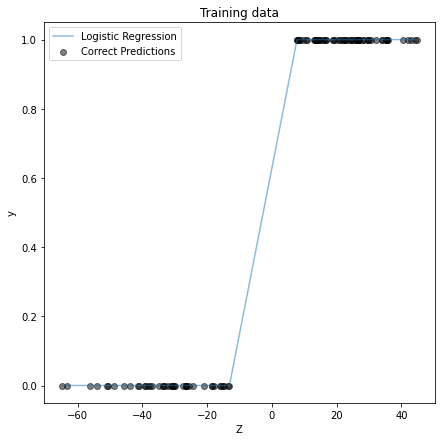

2 mispredictions out of 26 attempts


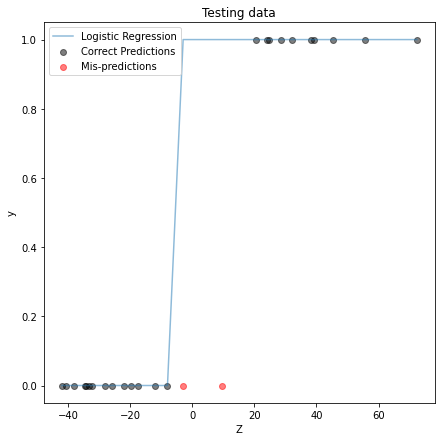

In [38]:
def plotSKLogistic(x, y, model, figsize=7, title='Training data'):
    plt.figure(figsize=(figsize,figsize))
    pred = x[(model.predict(x) == y), :]
    misPred = x[(model.predict(x) != y), :]
    print(f'{misPred.shape[0]} mispredictions out of {x.shape[0]} attempts')

    plt.scatter(np.dot(pred, model.coef_.T), model.predict(pred), color='k', alpha=.5)
    if misPred.shape[0] > 0:
        plt.scatter(np.dot(misPred, model.coef_.T), 1 - model.predict(misPred), color='r', alpha=.5)

    line = sorted(zip(np.dot(x, model.coef_.T), model.predict(x)))
    line_x, line_y = zip(*line)
    plt.plot(line_x, line_y, color='tab:blue', alpha=.5)

    plt.xlabel("Z")
    plt.ylabel("y")
    plt.legend(['Logistic Regression', 'Correct Predictions', 'Mis-predictions'])
    plt.title(title)
    plt.show()

plotSKLogistic(X_train, y_train, lor)
plotSKLogistic(X_test, y_test, lor, title='Testing data')